# Activity 2

**Objective:** To use data visualization as an exploratory tool for the data

In this activity, I will continue exploring the [Mountains dataset](https://www.kaggle.com/abcsds/highest-mountains).

As a reminer, I will bring up the information of the dataset just to setup the stage for doing the analysis.

In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the data from CSV as a panda DataFrame object
mountains = pd.read_csv('../datasets/Mountains.csv')
# Show the first 5 rows of the dataframe
mountains.head()

Populating the interactive namespace from numpy and matplotlib


,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0


We can see that there is some interesting information about the mountains related to their geography with a mix of mountaineering history -- which is great! This is my way to learn more about the greatest mountain ranges in the world, because as a climber, that is something I should know, right? 

My work in this activity will focus in answering the following questions:
1. What is the range with the highest mountains?
2. Is there a correlation between the number of successful ascents and the height of the mountains?
3. In which range do we find the mountains with more failed attempts than actual acsents?
4. Is there a correlation between the Prominence and the success of an expedition?

Some of the questions in the list are kind of obvious (at least to me), but I will go ahead with the exercise just to practice my coding, and who knows, I might be surprised...

## Housekeeping

In the previous activity I miss an important part of data cleaning. I was naive and assumed that the data was completly clean. However, upon revision of the results I presented [here](https://nbviewer.jupyter.org/github/jugc/data_sci_learning_club/blob/master/01/activity-01.ipynb), I noticed that the actual rank for the mountain **Distaghil Sar** is not 20 as I said it was, it is actually 19. But, this means it should have been located in row number 18 (zero-indexing) of the data frame, right? In reality it is located in row 19, which doesn't make too much sense. Here is a snapshot of rows 10 to 20 of the dataset. I have included only the columns **Rank**, **Mountains** and **Height (m)** for the sake of clarity.

In [2]:
print(mountains.loc[10:20][["Rank","Mountain","Height (m)"]])

    Rank                         Mountain  Height (m)
10    11  Gasherbrum I / Hidden Peak / K5        8080
11    12                  Broad Peak / K3        8051
12    13               Gasherbrum II / K4        8035
13    14                     Shishapangma        8027
14    15                    Gyachung Kang        7952
15   110                   Gasherbrum III        7946
16    16                     Annapurna II        7937
17    17                    Gasherbrum IV        7932
18    18                       Himalchuli        7893
19    19                    Distaghil Sar        7884
20    20                      Ngadi Chuli        7871


Take a look at row 15, the rank assigned to the mountain **Gasherbrum III** is 110, when it should have been 16. This creates a shift in the rest of the data, in addition that the assigned rank is wrong. This is not the only misplaced datapoint in the dataset:

In [3]:
print(mountains.loc[20:23][["Rank","Mountain","Height (m)"]])

    Rank         Mountain  Height (m)
20    20      Ngadi Chuli        7871
21   111           Nuptse        7864
22    21  Khunyang Chhish        7823
23    22  Masherbrum / K1        7821


Here, the mountain **Nuptse** is ranked as 111, when it should be 21. Like these two data points there is more. So, I propose to do the following data cleaning:

1. Create a list that starts from 1, increments by 1 and whose final value is the length of the dataset. This list will be named rank and will be used to replace the data in the **Rank** column of the dataframe.
2. Just to make sure everything is orgnized in descending order, I will orgnize the data in descending order using the column **Height (m)**.
3. Replace the current data in **Rank** with the list created in step 1.

In [4]:
# Step 1 -- create new Rank list
dim = mountains.shape
# the method .shape() returns a list containing the number of rows[0] and columns[1] in the data frame.
new_rank = range(1,dim[0]+1)

In [5]:
# Step 2 -- Sort data in descending order using the Height values
mountains.sort_values(by=("Height (m)"), ascending=False)

# Just to make sure, let's look at a the previous example to verify that is correct. 
print(mountains.loc[90:102][["Rank","Mountain","Height (m)"]])

     Rank                     Mountain  Height (m)
90     83                   Siguang Ri        7309
91     84       The Crown / Huang Guan        7295
92     85                   Gyala Peri        7294
93     86                    Porong Ri        7292
94     87     Baintha Brakk / The Ogre        7285
95     88                  Yutmaru Sar        7283
96     89          Baltistan Peak / K6        7282
97     90  Kangpenqing / Gang Benchhen        7281
98     91                Muztagh Tower        7276
99     92                    Mana Peak        7272
100   118                Dhaulagiri VI        7268
101    93                        Diran        7266
102    94      Labuche Kang III / East        7250


In [6]:
# Step 3 -- Replace the values in the Rank column with the correct rank order (list new_rank)
mountains.loc[0:dim[0]]["Rank"] = new_rank

# Check: Nuptse and Gasherbrum III now have the correct rank.
print(mountains.loc[13:23][["Rank","Mountain","Height (m)"]])

    Rank         Mountain  Height (m)
13    14     Shishapangma        8027
14    15    Gyachung Kang        7952
15    16   Gasherbrum III        7946
16    17     Annapurna II        7937
17    18    Gasherbrum IV        7932
18    19       Himalchuli        7893
19    20    Distaghil Sar        7884
20    21      Ngadi Chuli        7871
21    22           Nuptse        7864
22    23  Khunyang Chhish        7823
23    24  Masherbrum / K1        7821


If we compare the result from step 3 and step 2, we can see that the dataframe has been fixed. Now, the rank order is consistent.

## Data visualization

In this section we will try to answer the questions presented at the begining using data visualization with `matplotlib`.

**What is the range with the highest mountains?**

One way to find out is to slice the data per range and find the lowest rank in each group. If we do this, there is an obvious answer: the Himalayas range will come up due to the Everest. Another way to do it is to count how many mountains per range are located in the upper 25% percentile. This is my proposed strategy:
1. Define the catgories. In this case, I will use the method [`groupby`](http://pandas.pydata.org/pandas-docs/stable/groupby.html#iterating-through-groups) which allows me to create an additional object that splits my data frame into groups. In this case, I have chosen to use the column "Range" as a category for my groups.
2. Count how many entries on each group are higher than the value correcponding to the upper 25% percentile.
3. Plot the results in a histogram.

In [7]:
# Here I find the 25% percentile using the height variable
upper25per = mountains["Height (m)"].quantile(0.75)
print(upper25per)
# Step 1 -- Spliting the data into groups by the name of the range.
range_group = mountains.groupby('Range')

# Show the resulting groups.
range_group.groups

7775.5


{'Annapurna Himalaya': [9, 16, 46, 63, 109],
 'Assam Himalaya': [29, 92],
 'Baiku Himalaya': [97],
 'Baltoro Karakoram': [1, 10, 11, 12, 15, 17, 48, 71, 88, 98],
 'Batura Karakoram': [26, 42, 58, 75],
 'Daxue Shan (Hengduan Shan)': [45],
 'Dhaulagiri Himalaya': [6, 31, 39, 41, 77, 100, 103],
 'Ganesh Himalaya': [67],
 'Garhwal Himalaya': [24, 30, 65, 82, 99, 105],
 'Hindu Kush': [34, 56, 73, 85],
 'Hispar Karakoram': [19, 22, 27, 43, 57, 59, 69, 95, 112, 117],
 'Jomolhari Himalaya': [86],
 'Jugal Himalaya': [13],
 'Kangchenjunga Himalaya': [2, 33, 61, 70, 81, 84],
 'Kongur Shan (Eastern Pamirs)': [40, 51],
 'Kula Kangri Himalaya': [44, 50, 108],
 'Labuche Himalaya': [80, 102],
 'Langtang Himalaya': [35, 93, 107, 114],
 'Lunana Himalaya': [111, 115],
 'Mahalangur Himalaya': [0, 3, 4, 5, 14, 21, 25, 49, 83, 87, 90, 110],
 'Manaslu Himalaya': [7, 18, 20],
 'Masherbrum Karakoram': [23, 38, 89, 96],
 'Muztagata (Eastern Pamirs)': [47],
 'Nagarze Himalaya': [113],
 'Nalakankar Himalaya': [36

The previous result shows all the groups defined by the "Range" column. It is returned as a dictionary where each key is the **mountain range** and the values are lists that contain the row number for the entry associated to each mountain range. For example, if we want to see the rows for a specific range we can get it like this:

In [8]:
range_group.groups['Annapurna Himalaya']

[9, 16, 46, 63, 109]

In [9]:
# Step 2 -- Count the number of entries per group are above the upper 25% percentile
# Initialize a dictionary that will be used to store the final count for the higher mountains per range!
HighMountainRange = {}
for name,group in range_group:
    # Count the entries in the column "Height (m)" per group that are in the upper percentile.
    tmpCount = (group["Height (m)"]>upper25per).sum()
    # Checking if it is higher than zero in case there is no mountain above the threshold
    if tmpCount > 0:
        # Save it on the dictionary
        HighMountainRange[name] = (group["Height (m)"]>upper25per).sum()
    
print(HighMountainRange)

{'Baltoro Karakoram': 6, 'Batura Karakoram': 1, 'Garhwal Himalaya': 1, 'Dhaulagiri Himalaya': 1, 'Nanga Parbat Himalaya': 1, 'Rakaposhi-Haramosh Karakoram': 1, 'Masherbrum Karakoram': 1, 'Hispar Karakoram': 3, 'Mahalangur Himalaya': 7, 'Jugal Himalaya': 1, 'Assam Himalaya': 1, 'Annapurna Himalaya': 2, 'Kangchenjunga Himalaya': 1, 'Manaslu Himalaya': 3}


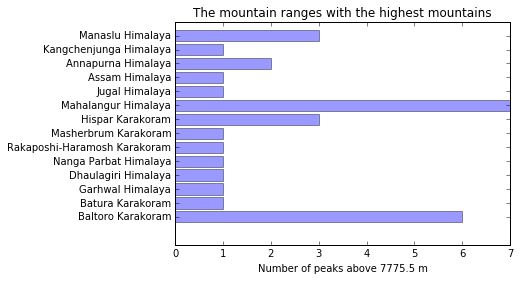

In [10]:
# Step 3 - Plot the results
y_pos = np.arange(len(HighMountainRange))

plt.barh(y_pos,HighMountainRange.values(),align='center', alpha=0.4)
plt.yticks(y_pos, HighMountainRange.keys())
plt.xlabel('Number of peaks above %s m'%(upper25per))
plt.title('The mountain ranges with the highest mountains')

plt.show()

There is no surprise that the range with the most highest mountains is the Mahalangur Himalaya range, which contains four of the highest peaks in the world: Mount Everest, Lhotse, Makalu, and Cho Oyu.

**Is there a correlation between the number of successful ascents and the height of the mountains?**

For finding a correlation, I will first do a scatter of the columns Height vs. Successful ascents and see how it looks like. Depending on how "spread" the data points are, we can conclude whether or not there is a correlation between these two variables.

At the begining of this notebook, we can see a printout of the first five rows of the dataset. Mount Everest as recorded more tahn 145 ascents before 2004 (>>145). In terms of handling the data, the fact that this datapoint contains two non-numeric characters, it makes this column of the type object. Whereas the data in the column of failed ascents is of the type float. Because of this, it will necessary to do some dat cleaning. That is, I will have to find a way to represent the fact that the ascents are much more than 145 (probably in the thousands) and either replace this value in the data frame, or plot it in a way that is clear.

Since we want to find the correlation between the two variables using a scatter, then we need numeric values to pass to the `scatter` function from matplotlib. A quick search on google tells me that up until 2004 the number of successful ascents was 2249. See the source [here](http://www.everesthistory.com/everestsummits/summitsbyyear.htm).

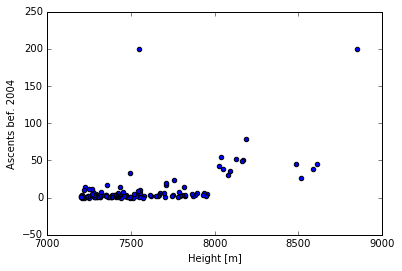

In [11]:
# Replace the datapoint. 

'''From: https://www.kaggle.com/shawger/d/abcsds/highest-mountains/mountains-beyond-mountains. After struggling a lot
with the data cleaning, I found that someone else also did some data analysis on the mountains dataset. So, I decided
to borrow this little function to help me with the cleaning'''
# If there are a large amount of climbers, just set it too 200
def cleanNumbers(x):
    xString = str(x)
    if ">" in xString:
        x = 200
    if "Many" in xString:
        x = 200
    if xString == "" or xString == None or xString == "nan":
        x = 0
    return int(x)

# Convert to numeric and clean the non-numeric entries
mountains['Ascents bef. 2004'] = mountains['Ascents bef. 2004'].apply(cleanNumbers)

# Plot the scatter
plt.scatter(mountains['Height (m)'],mountains['Ascents bef. 2004'])
plt.xlabel('Height [m]')
plt.ylabel('Ascents bef. 2004')

We see that the most ascents are for higher peaks, like Mount Everest. Actually, the number of ascents doesn't depend on the height of the mountain. From a climbing perspective, some of these peaks contain a lot of history and were climbed initially by routes that were not so technical. That is no to say that it is easy to climb them. But, with the right physical conditions and the company of a guide (and a lot of cash) most people can climb them (hence the 2000+ ascents of Mount Everest). The spread show here is a bit noisy, except for the lower peaks which also see lower ascents. My guess is that they are not as popular as those above 8000 m, and some of them can be more remote in comparison to Everest, who sees hundreds of expeditions each year. Also, some of these peaks can be more technically challenging so they are usually climbed by very experienced alpinists such as mountain guides, professional climbers or really good recreational climbers.

**In which range do we find the mountains with more failed attempts than actual successful acsents?**

Since we have our groups defined by range, let's continue exploring the dataset by answering this question. This is the procedure I propose:

1. Compute the ratio of successful ascents to failed attempts.
2. Compare which one is higher per group (range).
3. Plot the results

In [19]:
# Step 1 -- Compute the ratio of successful ascents to failed attempt
range_group.groups

HardestRange = {}
for name,group in range_group:
    HardestRange[name] = max(group['Failed attempts bef. 2004']/group['Ascents bef. 2004'])
print(HardestRange)    

{'Saltoro Karakoram': 1.0, 'Tian Shan': nan, 'Garhwal Himalaya': 0.8571428571428571, 'Jomolhari Himalaya': 0.0, 'Saser Karakoram': 0.66666666666666663, 'Kula Kangri Himalaya': inf, 'Pamir (Akademiya Nauk Range)': nan, 'Annapurna Himalaya': 3.1666666666666665, 'Daxue Shan (Hengduan Shan)': 1.1666666666666667, 'Labuche Himalaya': 0.0, 'Ganesh Himalaya': 6.0, 'Dhaulagiri Himalaya': 5.0, 'Lunana Himalaya': nan, 'Panmah Karakoram': 4.333333333333333, 'Muztagata (Eastern Pamirs)': nan, 'Assam Himalaya': 2.0, 'Siachen Karakoram': 0.0, 'Rakaposhi-Haramosh Karakoram': 3.0, 'Nanga Parbat Himalaya': 1.2884615384615385, 'Nagarze Himalaya': 0.25, 'Rimo Karakoram': 3.0, 'Baiku Himalaya': 1.0, 'Langtang Himalaya': 0.9285714285714286, 'Kangchenjunga Himalaya': 6.0, 'Hindu Kush': 1.5, 'Kongur Shan (Eastern Pamirs)': 2.0, 'Manaslu Himalaya': 3.0, 'Baltoro Karakoram': 2.75, 'Batura Karakoram': 2.5, 'Yengisogat Karakoram': 3.0, 'Nalakankar Himalaya': 0.66666666666666663, 'Masherbrum Karakoram': 3.0, 'Hisp

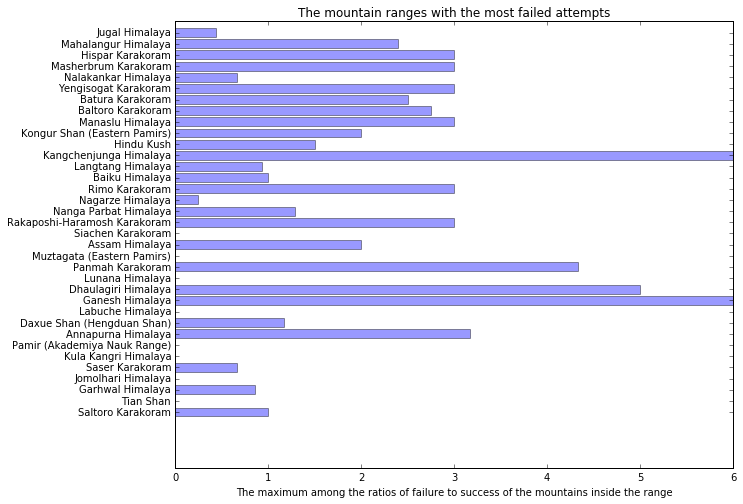

In [31]:
# Step 3 - Plot the results
y_pos = np.arange(len(HardestRange))
fig = plt.figure(1, [10, 8])
plt.barh(y_pos,HardestRange.values(),align='center', alpha=0.4)
plt.yticks(y_pos, HardestRange.keys())
plt.xlabel('The maximum among the ratios of failure to success of the mountains inside the range')
plt.title('The mountain ranges with the most failed attempts')

plt.show()